In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import skimage.io

from tensorflow.keras.utils import to_categorical

## Before

/Users/julia/Desktop/CV_project2/original.tif
(696, 520)
(520, 696, 3)


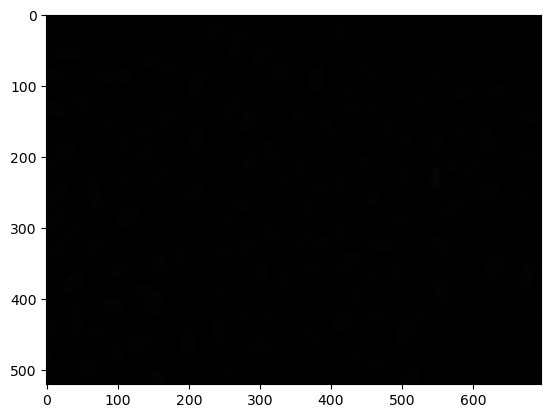

In [4]:
folder_path = '/Users/julia/Desktop/CV_project2/'

for filename in os.listdir(folder_path):
    if filename == 'original.tif':
        image_path = os.path.join(folder_path, filename)
        print(image_path)
        img = Image.open(image_path)
        print(img.size)
        
        # Convert the image to a NumPy array
        img_array = np.array(img)
        print(img_array.shape)

        # Display the image using plt.imshow()
        plt.imshow(img_array)
        plt.show()

## After

/Users/julia/Desktop/CV_project2/masks/training/0predicted.tif
(520, 696)
(520, 696)


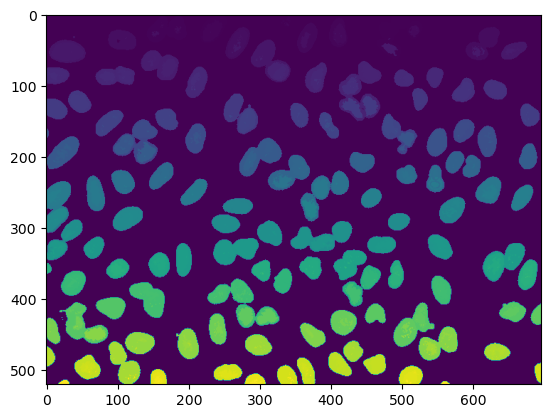

In [4]:
import skimage.io
import matplotlib.pyplot as plt
import skimage.morphology

folder_path = '/Users/julia/Desktop/CV_project2/masks/training'

for filename in os.listdir(folder_path):
    if filename == '0predicted.tif':
        image_path = os.path.join(folder_path, filename)
        print(image_path)
        gt = skimage.io.imread(image_path)

        # Keep first channel only
        gt = gt[:,:,0]
        print(gt.shape)

        # Label independent connected components
        gt = skimage.morphology.label(gt)

        img_array = np.array(gt)
        plt.imshow(img_array)
        print(img_array.shape)
        plt.show()

(520, 696)


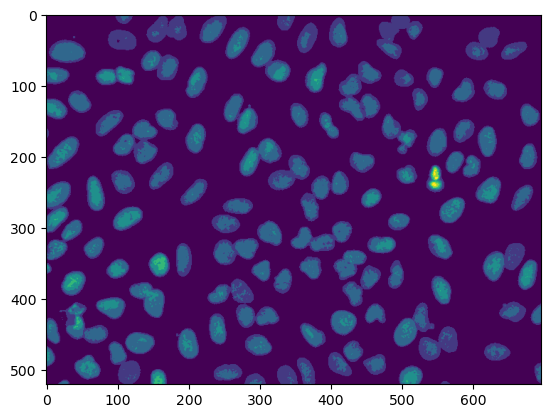

In [6]:
img_path = '/Users/julia/Desktop/yolov5/cells/test/images/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.tif'
gt = skimage.io.imread(image_path)
# Keep first channel only
gt = gt[:,:,0]
img_array = np.array(gt)
plt.imshow(img_array)
print(img_array.shape)
plt.show()

## Image detection

https://www.youtube.com/watch?v=RXbtSwZsoEU
    https://www.youtube.com/watch?v=RXbtSwZsoEU

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.morphology

def bounding_boxes(img_path):
    # Load the mask image and keep the first channel only
    gt = skimage.io.imread(img_path)
    gt = gt[:, :, 0]

    # Label the independent connected components
    gt = skimage.morphology.label(gt)

    # Convert the labeled image to a numpy array
    img_array = np.array(gt)

    # Extract bounding boxes from the img_array
    contours, _ = cv2.findContours(img_array.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, x + w, y + h))
    
    return bounding_boxes


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.morphology

def bounding_boxes(img_path):
    # Load the mask image and keep the first channel only
    gt = skimage.io.imread(img_path)
    gt = gt[:, :, 0]

    # Label the independent connected components
    gt = skimage.morphology.label(gt)

    # Convert the labeled image to a numpy array
    img_array = np.array(gt)

    # Extract bounding boxes from the img_array
    contours, _ = cv2.findContours(img_array.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Normalize the values
        img_width, img_height = gt.shape[1], gt.shape[0]
        x_normalized = x / img_width
        y_normalized = y / img_height
        w_normalized = w / img_width
        h_normalized = h / img_height

        bounding_boxes.append((x_normalized, y_normalized, x_normalized + w_normalized, y_normalized + h_normalized))
    
    return bounding_boxes


In [3]:
import skimage.io
import matplotlib.pyplot as plt
import skimage.morphology

folder_path = '/Users/julia/Desktop/CV_project2/masks/validation/'

for filename in os.listdir(folder_path):
    # creating bounding_boxes
    image_path = os.path.join(folder_path, filename)
    bb = bounding_boxes(image_path)
    bb = str(bb)
    bb = bb.replace("[", "")
    bb = bb.replace("]", "")
    bb = bb.replace("(", "0 ")
    bb = bb.replace("), ", "\n")
    bb = bb.replace(",", "")
    bb = bb.replace(")", "")
    
    # saving them
    f_name = filename.replace(".png", ".txt")
    with open(f_name, 'w') as f:
        f.write(str(bb))

In [8]:
import torchvision.transforms as T

In [3]:
import os
folder_path = '/Users/julia/Desktop/yolov5/cells/val/images'

for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    print('python detect.py --weights runs/train/exp7/weights/best.pt --source ' + image_path)

python detect.py --weights runs/train/exp7/weights/best.pt --source /Users/julia/Desktop/yolov5/cells/val/images/IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4C949B3B.tif
python detect.py --weights runs/train/exp7/weights/best.pt --source /Users/julia/Desktop/yolov5/cells/val/images/IXMtest_K12_s7_w12A7857A5-3C92-4A08-8E81-2CA8A99F67AE.tif
python detect.py --weights runs/train/exp7/weights/best.pt --source /Users/julia/Desktop/yolov5/cells/val/images/IXMtest_J20_s1_w1EEE65E52-7AD8-47C7-A286-6E84C5D77953.tif
python detect.py --weights runs/train/exp7/weights/best.pt --source /Users/julia/Desktop/yolov5/cells/val/images/IXMtest_L10_s6_w12D12D64C-2639-4CA8-9BB4-99F92C9B7068.tif
python detect.py --weights runs/train/exp7/weights/best.pt --source /Users/julia/Desktop/yolov5/cells/val/images/IXMtest_I01_s4_w1218CC565-C87E-4390-936A-4D3E51BC10DB.tif
python detect.py --weights runs/train/exp7/weights/best.pt --source /Users/julia/Desktop/yolov5/cells/val/images/IXMtest_C18_s1_w11C16FC59-2E29-4